# Random Forest

![](banner_random_forest.jpg)

_<p style="text-align: center;"> A committee of myopic experts determines the winner. </p>_ 

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

**Re-write this to be more detailed about how random forest works with randomly selected variables.**

An ensemble method is a model construction method that combines several predictive models to build a new predictive model.

**Random forest** combines models built using the decision tree method, a single set of hyper-parameter values, different variable samples, and different data samples.

The **random forest** method is bootstrap aggregation applied to a modified decision tree classifier construction method.  The modification is to use different randomly selected subsets of the predictor variables at various stages of tree construction, rather than use all predictor variables at all stages of tree construction.   

## Introduction

Motivation, context, history, related topics ...

## Terms

## Data

observations,variables
72,3


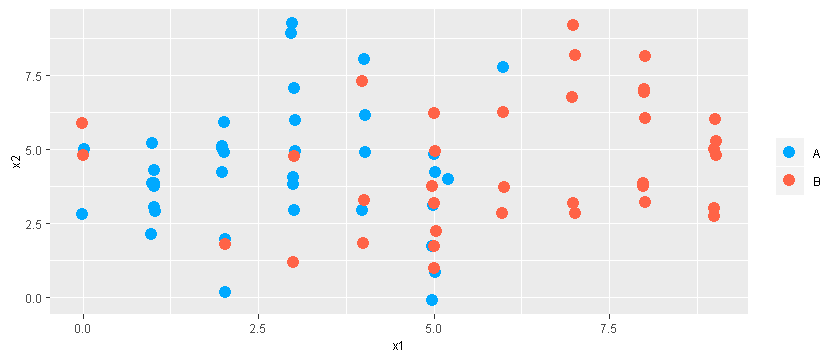

In [2]:
data = data.frame(x1=c(1,2,3,4,3,2,5,4,3,2,5,3,3,2,3,1,1,5,4,1,5,1,0,0,1,2,2,5,1,3,1,2,3,4,5,6,3,2,6,5,4,5,3,8,9,0,0,9,7,4,5,5,4,5,6,6,9,8,7,7,8,8,9,9,7,7,5,5,8,8,9,8),
                  x2=c(3,2,6,5,4,5,3,8,9,0,0,9,7,4,5,5,4,5,6,3,2,4,3,5,4,6,5,1,2,3,4,5,4,3,4,8,1,2,3,4,3,2,5,4,3,6,5,3,3,2,3,6,7,5,4,6,5,7,8,9,8,7,6,5,7,3,1,2,3,4,5,6),
                  class=c("A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B"))
new = data.frame(x1=5.2, x2=4)

size(data)
ggplot(data) +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03)) +
geom_point(aes(x=x1, y=x2), data=new) + 
scale_color_manual(values=PALETTE)

## Model Based on Original Data
Here we consider a decision tree model based on the original data.  We use the model to predict the class of a new observation.

A,B
0.4615385,0.5384615


x1,x2,class.predicted
5.2,4,B


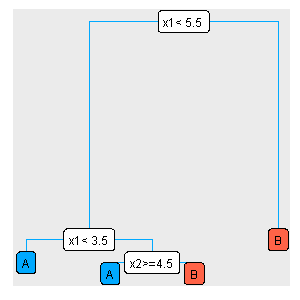

In [3]:
model = rpart(class ~ x1+x2, data, method="class")
prob = predict(model, new, type="prob")
class.predicted = as.class(prob, "A", cutoff=0.5)

prob
data.frame(new, class.predicted)

output_size(2.5,2.5)
ggtree(model) + scale_fill_manual(values=PALETTE)
output_size(restore)

## Bootstrap Aggregating (Bagging)


Build a model comprising other constituent models, which are all built using a single predictive analytic method and set of hyper-parameter settings, but based on different bootstrap samples of the data.  The ensemble model makes predictions based on the most popular of the constituent models' predictions.

You can think of a bootstrap aggregated model as a committee of experts.  Each expert has studied a particular field of knowledge, different from (but possibly overlapping with) those that the other experts have studied. 

Bootstrap aggregating is also known as "bagging".  

### Bootstrap Samples

A bootstrap sample of data is a set of randomly selected observations from that data, with replacement allowed.  The size of the bootstrap sample is the same as the size of the data.  So, the number of observations in the bootstrap sample is the same as the number of observations in the data.  Usually, many of the observations in the bootstrap sample are duplicates of each other. 

Here we take 3 different bootstrap samples of the data.

In [4]:
set.seed(12345)
data.1 = sample_n(data, nrow(data), replace=TRUE)
data.2 = sample_n(data, nrow(data), replace=TRUE)
data.3 = sample_n(data, nrow(data), replace=TRUE)

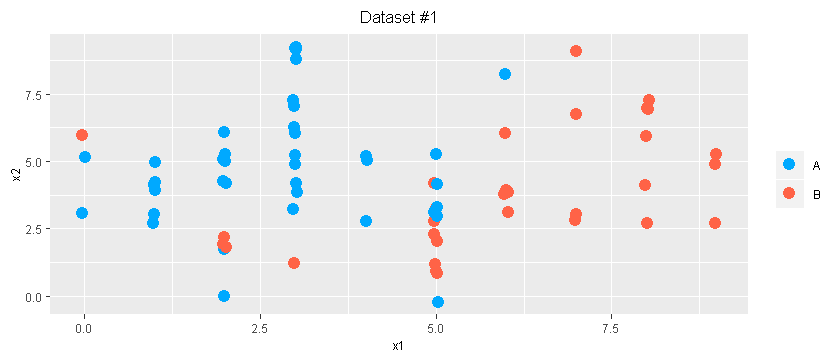

In [5]:
ggplot(data.1) + ggtitle("Dataset #1") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

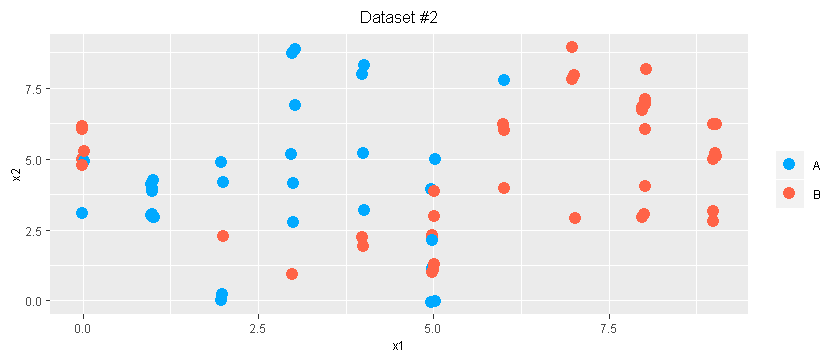

In [6]:
ggplot(data.2) + ggtitle("Dataset #2") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

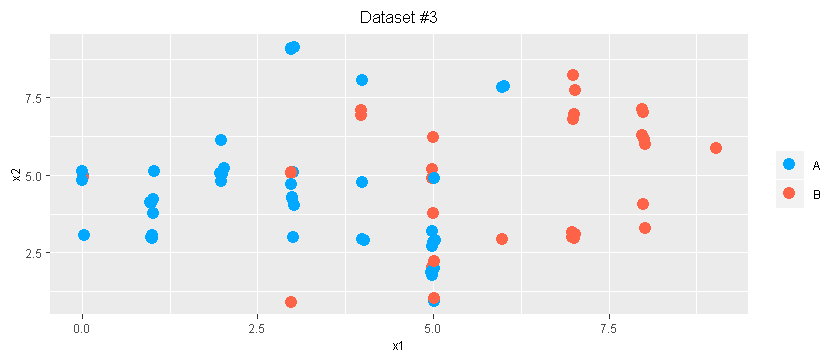

In [7]:
ggplot(data.3) + ggtitle("Dataset #3") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

### Models Based on Bootstrap Samples

We can build several models, using the same method and hyper-parameters, but based on the different bootstrap samples of data.  Each model is an "expert" on the particular subset of data represented in the bootstrap sample on which it is based.

Here we build 3 different such models and use them to make 3 different predictions of the class of a new observation.

Model 1:

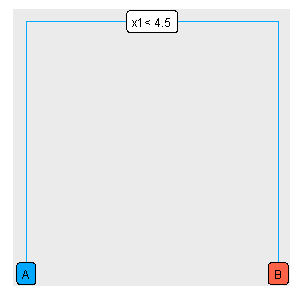

In [8]:
model.1 = rpart(class ~ x1+x2, data.1, method="class")

output_size(2.5,2.5)
ggtree(model.1) + scale_fill_manual(values=PALETTE)
output_size(restore)

Model 2:

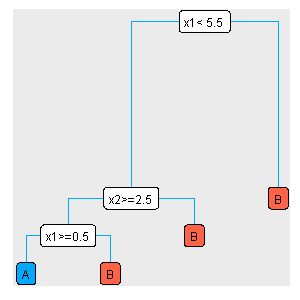

In [9]:
model.2 = rpart(class ~ x1+x2, data.2, method="class")

output_size(2.5,2.5)
ggtree(model.2) + scale_fill_manual(values=PALETTE)
output_size(restore)

Model 3:

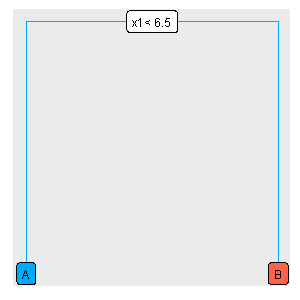

In [10]:
model.3 = rpart(class ~ x1+x2, data.3, method="class")

output_size(2.5,2.5)
ggtree(model.3) + scale_fill_manual(values=PALETTE)
output_size(restore)

#### Predictions

New observation's class predicted by Model 1: 

In [11]:
prob.1 = predict(model.1, new, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)

prob.1
data.frame(new, class.predicted.1)

A,B
0.2058824,0.7941176


x1,x2,class.predicted.1
5.2,4,B


New observation's class predicted by Model 2: 

In [12]:
prob.2 = predict(model.2, new, type="prob")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)

prob.2
data.frame(new, class.predicted.2)

A,B
0.9166667,0.08333333


x1,x2,class.predicted.2
5.2,4,A


New observation's class predicted by Model 3: 

In [13]:
prob.3 = predict(model.3, new, type="prob")
class.predicted.3 = as.class(prob.3, "A", cutoff=0.5)

prob.3
data.frame(new, class.predicted.3)

A,B
0.75,0.25


x1,x2,class.predicted.3
5.2,4,A


#### Vote

We can compare the predictions of models and vote for the most popular prediction.  

Here models 1 and 2 predict that the class of the new observation is A, and model 3 predicts B.  The vote is 2 to 1 in favor of A, so the bootstrap aggregated model predicts A.

In [14]:
data.frame(class.predicted.1, class.predicted.2, class.predicted.3)

class.predicted.1,class.predicted.2,class.predicted.3
B,A,A


In [15]:
data.frame(class.predicted=vote(class.predicted.1, class.predicted.2, class.predicted.3))

class.predicted
A


## Random Forest

The **random forest** method is bootstrap aggregation applied to a modified decision tree classification method.  The modification is to use different randomly selected subsets of the predictor variables at various stages of tree construction, rather than use all predictor variables at all stages of tree construction.   

## Code

### Useful Functions

In [16]:
# vote # provided in apparatus code cell above
# focus_data # provided in apparatus code cell above

## Expectations

Know about this:
* How to bootstrap aggregate a classification method, conceptually and using R.
* How to boost a classification method, conceptually and using R.
* How to stack classification methods, conceptually and using R.

## Further Reading

* http://ciml.info/dl/v0_99/ciml-v0_99-ch13.pdf
* https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/
* https://en.wikipedia.org/wiki/Ensemble_learning

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised July 17, 2020
</span>
</p>